# Librerias

In [1]:
# Carga de librerías
import numpy as np
import tensorflow as tf
import PIL
import PIL.Image
import pathlib
import scipy as sp
import seaborn as sns
from itertools import product
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
import os
import pathlib
from pathlib import Path  

In [2]:
import pickle
import sys
from pathlib import Path

# Añadir el directorio raíz del proyecto a sys.path
module_path = Path('/Users/Cesar/Desktop/Proyecto-CSG/').resolve()
if module_path not in sys.path:
    sys.path.append(str(module_path))

# Añadir el directorio que contiene 'new_spectral_metric' a sys.path
new_spectral_metric_path = module_path / '/Users/Cesar/Desktop/Proyecto-CSG/new_spectral_metric/'
if new_spectral_metric_path not in sys.path:
    sys.path.append(str(new_spectral_metric_path))

from numpy.linalg import LinAlgError
from scipy.sparse.csgraph import laplacian
# from spectral_metric.lib import find_samples, compute_expectation_with_monter_carlo 
from new_spectral_metric.new_estimator_intra_class import CumulativeGradientEstimator
from new_spectral_metric.new_visualize import make_graph
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D, Lambda
from tensorflow.keras import backend as K
from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib.collections import LineCollection
from matplotlib.font_manager import FontProperties
from pathlib import Path

# DATASET DESDE DIRECTORIO 

In [3]:
#Lectura de dataset

directorio_dataset = ('../Datasets/MNIST')
directorio_dataset = pathlib.Path(directorio_dataset)

# Lectura de la carpeta train
directorio_train = ('../Datasets/MNIST/train')
directorio_train = pathlib.Path(directorio_train)

# Lectura de la carpeta test
directorio_test = ('../Datasets/MNIST/test')
directorio_test = pathlib.Path(directorio_test)

total_dataset = len(list(directorio_dataset.glob('*/*/*.png')))  # Cuenta la cantidad de imagenes del dataset (Aqui busca en las subcarpetas del directorio del dataset)
total_train = len(list(directorio_train.glob('*/*.png')))  # Cuenta la cantidad de imagenes de train
total_test = len(list(directorio_test.glob('*/*.png')))  # Cuenta la cantidad de imagenes de test

print(f"Total imagenes dataset: {total_dataset}")
print(f"Total imagenes train: {total_train}")
print(f"Total imagenes test: {total_test}")

Total imagenes dataset: 70000
Total imagenes train: 60000
Total imagenes test: 10000


In [4]:
# Definir el batchsize del dataset completo
batch_size_total = total_dataset

In [5]:
# Dimensiones de imagen y tamaño de batch en train
img_height = 28
img_width = 28
#batch_size = 32
batch_size_train = total_train

In [6]:

import tensorflow as tf
import pathlib

# Data splitting (entrenamiento y validación)
train_images = tf.keras.preprocessing.image_dataset_from_directory(
  directorio_train,
  #validation_split=0.2,
  color_mode='rgb',
  label_mode='int',
  #subset="training",
  #seed=123,
  shuffle=False,
  image_size=(img_height, img_width),
  batch_size=batch_size_train)

Found 60000 files belonging to 10 classes.


In [7]:
# Dimensiones de imagen y tamaño de batch en test
img_height = 28
img_width = 28
#batch_size = 32
batch_size_test = total_test

In [8]:
# Data splitting (entrenamiento y validación)
test_images = tf.keras.preprocessing.image_dataset_from_directory(
  directorio_test,
  #validation_split=0.2,
  color_mode='rgb',
  label_mode='int',
  #subset="training",
  #seed=123,
  shuffle=False,
  image_size=(img_height, img_width),
  batch_size=batch_size_test)

Found 10000 files belonging to 10 classes.


In [9]:
# Contar el total de imágenes por clase en train y test  
class_counts_total = {p.name: len(list(p.glob('*.png'))) for p in directorio_dataset.glob('*/*')}  
class_counts_train = {p.name: len(list(p.glob('*.png'))) for p in directorio_train.glob('*')}  
class_counts_test = {p.name: len(list(p.glob('*.png'))) for p in directorio_test.glob('*')}  

# Encontrar el valor más bajo de imágenes por clase en train  
menor_train = min(class_counts_train.values()) if class_counts_train else None  # Se almacena el valor de la clase que menos muestras tiene

# Encontrar el valor más alto de imágenes por clase en train  
mayor_train = max(class_counts_train.values()) if class_counts_train else None  # Se almacena el valor de la clase que mas muestras tiene


# Encontrar el valor más bajo de imágenes por clase en test  
menor_test = min(class_counts_test.values()) if class_counts_test else None  # Se almacena el valor de la clase que menos muestras tiene

# Encontrar el valor más alto de imágenes por clase en test  
mayot_test = max(class_counts_test.values()) if class_counts_test else None  # Se almacena el valor de la clase que mas muestras tiene


# Mostrar el total de imágenes por clase en train  
print("\nTotal de imágenes por clase en train:")  
for class_name, count in class_counts_train.items():  
    print(f"Clase: {class_name}, Número de imágenes: {count}")  
print(f"Total imágenes train: {sum(class_counts_train.values())}")  

# Mostrar el valor más bajo en train  
print(f"Menor número de imágenes en train: {menor_train}")  

# Mostrar el valor más alto en train  
print(f"Mayor número de imágenes en train: {mayor_train}")  

# Mostrar el total de imágenes por clase en test  
print("\nTotal de imágenes por clase en test:")  
for class_name, count in class_counts_test.items():  
    print(f"Clase: {class_name}, Número de imágenes: {count}")  
print(f"Total imágenes test: {sum(class_counts_test.values())}")  

# Mostrar el valor más bajo en test  
print(f"Menor número de imágenes en test: {menor_test}")

# Mostrar el valor más alto en test  
print(f"Mayor número de imágenes en test: {mayot_test}")


Total de imágenes por clase en train:
Clase: 0_train, Número de imágenes: 5923
Clase: 1_train, Número de imágenes: 6742
Clase: 2_train, Número de imágenes: 5958
Clase: 3_train, Número de imágenes: 6131
Clase: 4_train, Número de imágenes: 5842
Clase: 5_train, Número de imágenes: 5421
Clase: 6_train, Número de imágenes: 5918
Clase: 7_train, Número de imágenes: 6265
Clase: 8_train, Número de imágenes: 5851
Clase: 9_train, Número de imágenes: 5949
Total imágenes train: 60000
Menor número de imágenes en train: 5421
Mayor número de imágenes en train: 6742

Total de imágenes por clase en test:
Clase: 0_test, Número de imágenes: 980
Clase: 1_test, Número de imágenes: 1135
Clase: 2_test, Número de imágenes: 1032
Clase: 3_test, Número de imágenes: 1010
Clase: 4_test, Número de imágenes: 982
Clase: 5_test, Número de imágenes: 892
Clase: 6_test, Número de imágenes: 958
Clase: 7_test, Número de imágenes: 1028
Clase: 8_test, Número de imágenes: 974
Clase: 9_test, Número de imágenes: 1009
Total imág

In [10]:
# Nombres de las clases
class_names_train = list(class_counts_train.keys())
class_names_test = list(class_counts_test.keys())
#class_names_total = sorted(list(set(class_names_train + class_names_test)))
class_names_total = list(class_counts_total.keys())

# Mostrar el número de clases y los nombres
print(f"\nNúmero de clases en train: {len(class_names_train)}")
print(f"Nombres de las clases en train: {class_names_train}")

print(f"\nNúmero de clases en test: {len(class_names_test)}")
print(f"Nombres de las clases en test: {class_names_test}")

print(f"\nNúmero total de clases en el dataset: {len(class_names_total)}")   # Este valor cambio si el nombre de las clases es diferente
print(f"Nombres de todas las clases en el dataset: {class_names_total}")     # Este valor tambien cambia si el nombre de las clases es diferente


Número de clases en train: 10
Nombres de las clases en train: ['0_train', '1_train', '2_train', '3_train', '4_train', '5_train', '6_train', '7_train', '8_train', '9_train']

Número de clases en test: 10
Nombres de las clases en test: ['0_test', '1_test', '2_test', '3_test', '4_test', '5_test', '6_test', '7_test', '8_test', '9_test']

Número total de clases en el dataset: 20
Nombres de todas las clases en el dataset: ['0_test', '1_test', '2_test', '3_test', '4_test', '5_test', '6_test', '7_test', '8_test', '9_test', '0_train', '1_train', '2_train', '3_train', '4_train', '5_train', '6_train', '7_train', '8_train', '9_train']


In [11]:
for images, labels0 in train_images.take(1):  # only take first element of dataset
    numpy_all_images = images.numpy()  # convertir el tensor de imágenes en un arreglo de numpy y ahora contiene las imágenes del conjunto de datos en formato de numpy.
    numpy_all_labels = labels0.numpy()  # convierte el tensor de etiquetas en un arreglo de numpy y ahora contiene las etiquetas del conjunto de datos en formato de numpy

numpy_all_images /= 255.0  # Scale the features to the [0, 1] range
print(numpy_all_images.shape)

# CIFAR-10 
fully_dataset_train = numpy_all_images.reshape((numpy_all_images.shape[0], numpy_all_images.shape[1]*numpy_all_images.shape[2]*numpy_all_images.shape[3])) # es un arreglo bidimensional donde cada fila representa una imagen y cada columna representa un píxel de la imagen
fully_labels_train = numpy_all_labels.reshape(numpy_all_labels.shape[0],)

(60000, 28, 28, 3)


# Dataset complexity using CSG

C:\Users\Cesar\Desktop\Proyecto-CSG\new_spectral_metric\new_visualize.py:48: RuntimeWarning: divide by zero encountered in divide
  similarities = difference.max() / difference * 100
C:\Users\Cesar\Desktop\Proyecto-CSG\new_spectral_metric\new_visualize.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


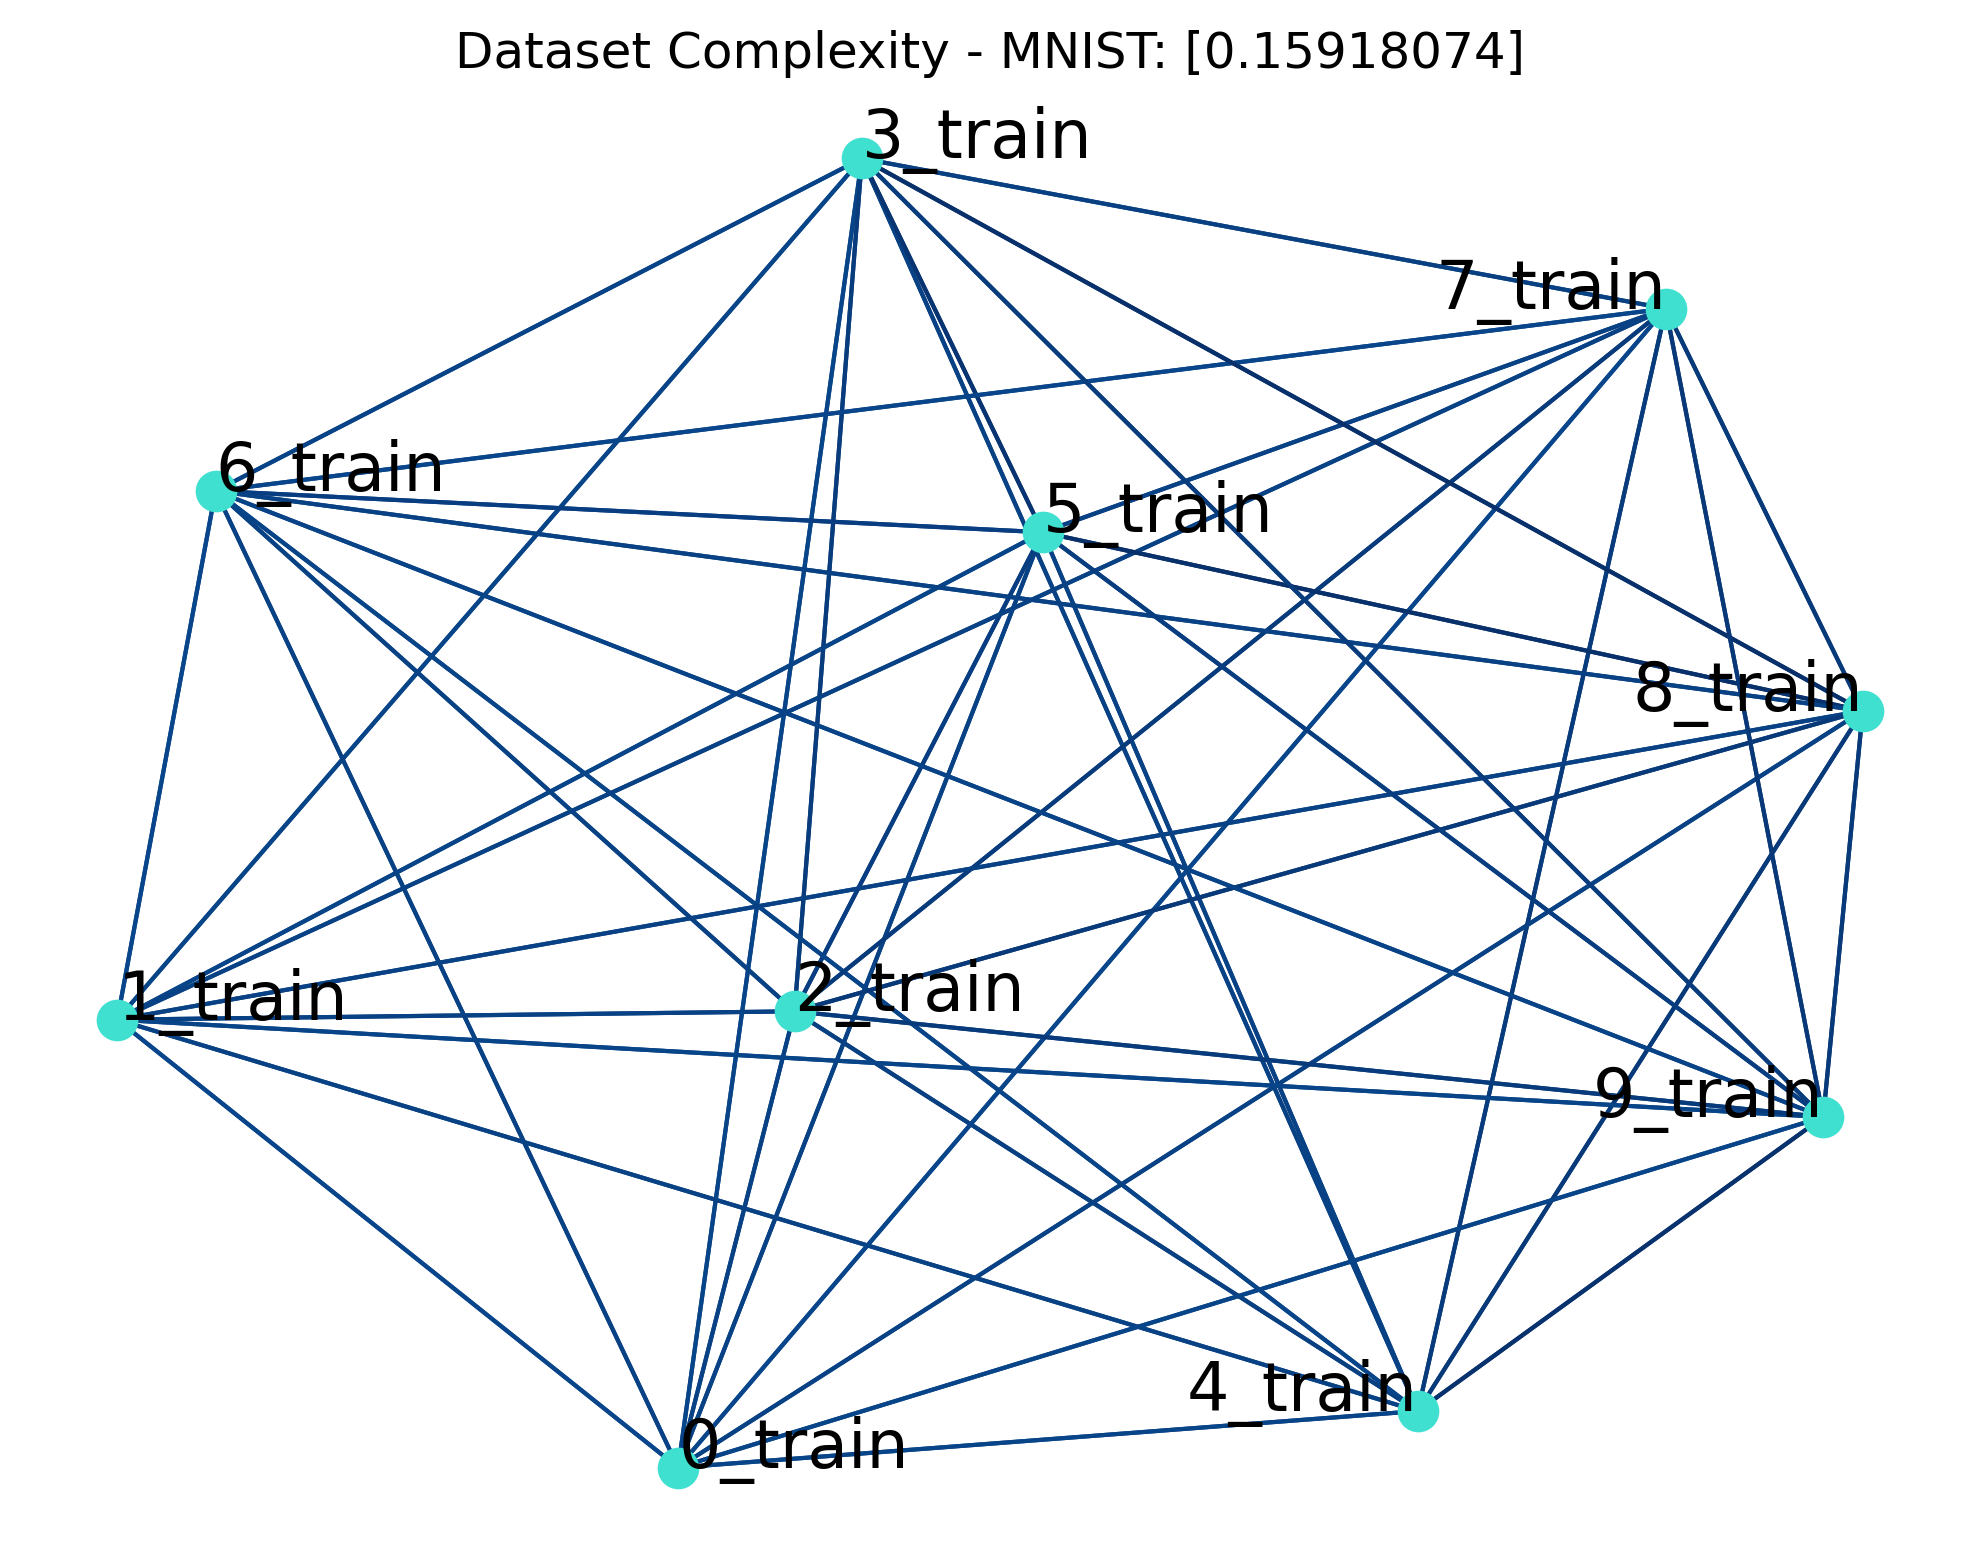

In [12]:

estimator = CumulativeGradientEstimator(M_sample=mayor_train, k_nearest=10)
estimator.fit(data=fully_dataset_train, target=fully_labels_train)
csg = estimator.csg  # The actual complexity values.
estimator.evals, estimator.evecs  # The eigenvalues and vectors.

make_graph(estimator.difference, title="Dataset Complexity - MNIST: "+str(csg), classes=class_names_train)

# Calcular la similitud entre clases

In [13]:
from scipy.stats import entropy  
import pandas as pd  

# Calcular la entropía por clase  
entropy_per_class = entropy(estimator.W / estimator.W.sum(-1)[:, None], axis=-1)  

# Encontrar la clase más confusa (mayor entropía)  
most_confused_class_index = np.argmax(entropy_per_class)  
most_confused_class_name = class_names_train[most_confused_class_index]  

print("Class that is the most confused (highest entropy):", most_confused_class_name)

Class that is the most confused (highest entropy): 8_train


In [14]:
# Obtener los índices de los pares más similares  

pairs = list(zip(*np.unravel_index(np.argsort(-estimator.W, axis=None), estimator.W.shape)))  

# Filtrar pares donde i != j para evitar pares de la misma clase  
pairs = [(i, j) for i, j in pairs if i != j]  

print("Most similar pairs")  
lst = []  
seen_pairs = set()  

# Iterar sobre los primeros 10 pares más similares  
for i, j in pairs:  
    # Verificar si el par o su inverso ya ha sido visto  
    if (i, j) not in seen_pairs and (j, i) not in seen_pairs:  
        lst.append({"Intent pair": f"{class_names_train[i]} <> {class_names_train[j]}", "Similarity": estimator.W[i, j]})  
        seen_pairs.add((i, j))  
        seen_pairs.add((j, i))  
    
    # Detenerse después de encontrar 10 pares únicos  
    if len(lst) == 10:  
        break  

# Mostrar los resultados en un DataFrame  
print(pd.DataFrame(lst))

Most similar pairs
          Intent pair  Similarity
0  5_train <> 8_train    0.084808
1  3_train <> 8_train    0.082364
2  4_train <> 9_train    0.076482
3  5_train <> 3_train    0.069904
4  9_train <> 7_train    0.054757
5  9_train <> 8_train    0.050559
6  8_train <> 2_train    0.050217
7  8_train <> 4_train    0.045376
8  7_train <> 8_train    0.044588
9  9_train <> 2_train    0.043102


# Obtener los nombres de las imagenes en train o test (dependiendo de lo que se quiera probar)

In [15]:
# Obtener todos los nombres de archivo en el dataset
filenames = [str(f) for f in directorio_train.glob('*/*.png')]

# Crear un mapeo de índices a rutas completas de archivo  
filenames_dict = {i: str(f) for i, f in enumerate(directorio_train.glob('*/*.png'))} 


# Calcular la similitud entre muestras

# 1. Visualizar las muestras (par de imagenes) mas similares entre la misma clase

Muestras más similares entre las imágenes de la misma clase 

Clase: 0_train
Forma de la matriz de la clase 0_train: (5923, 5923)
	743.png (0_train) vs 781.png (0_train), Similitud: 0.9469
	28125.png (0_train) vs 28041.png (0_train), Similitud: 0.9382
	36667.png (0_train) vs 36741.png (0_train), Similitud: 0.9285
	10283.png (0_train) vs 10203.png (0_train), Similitud: 0.9275
	13077.png (0_train) vs 13081.png (0_train), Similitud: 0.9261
	11683.png (0_train) vs 6337.png (0_train), Similitud: 0.9256
	25051.png (0_train) vs 19583.png (0_train), Similitud: 0.9223
	37841.png (0_train) vs 30891.png (0_train), Similitud: 0.9214
	34553.png (0_train) vs 21521.png (0_train), Similitud: 0.9210
	1195.png (0_train) vs 1359.png (0_train), Similitud: 0.9204

Muestras más atípicas de esta clase:
	#1: 743.png con 1 apariciones
	#2: 781.png con 1 apariciones
	#3: 28125.png con 1 apariciones
	#4: 28041.png con 1 apariciones
	#5: 36667.png con 1 apariciones
	#6: 36741.png con 1 apariciones
	#7: 10283.png 

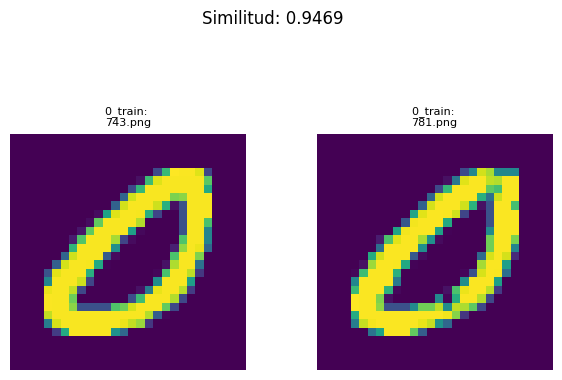

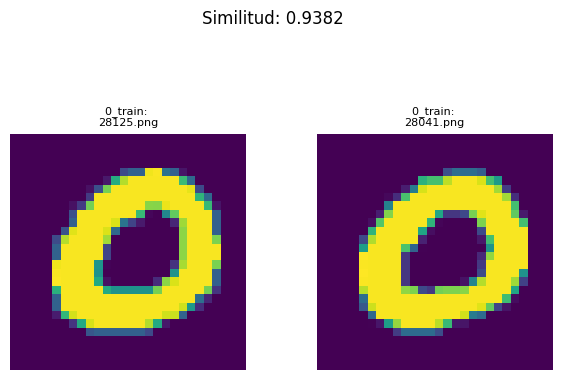

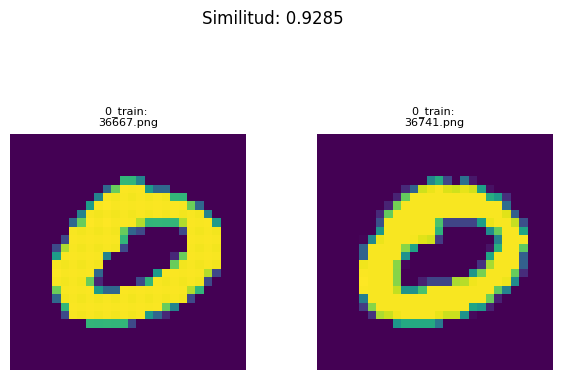

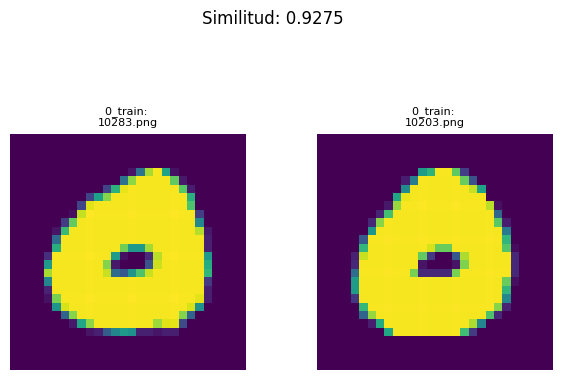

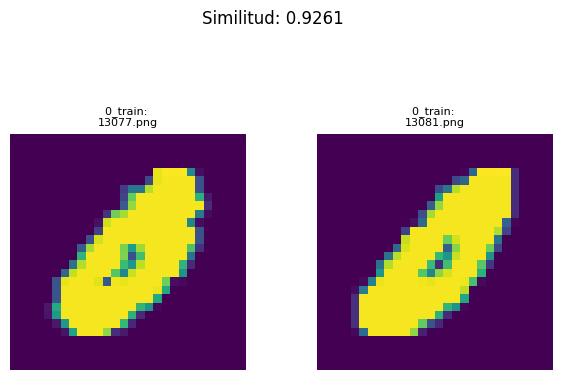

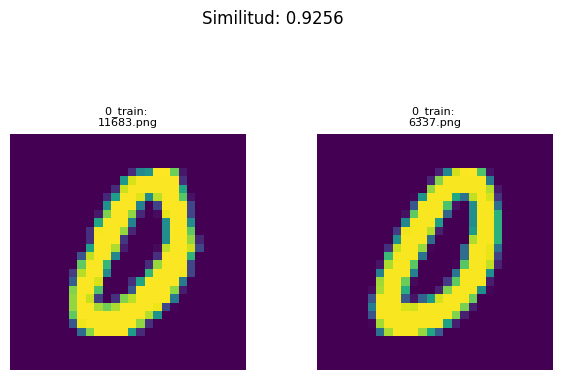

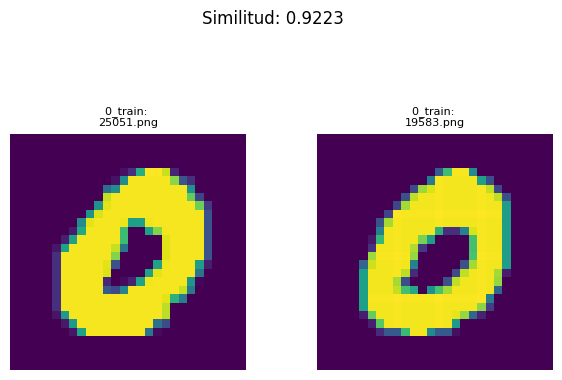

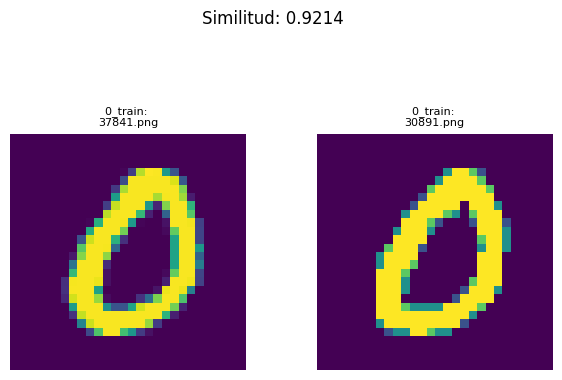

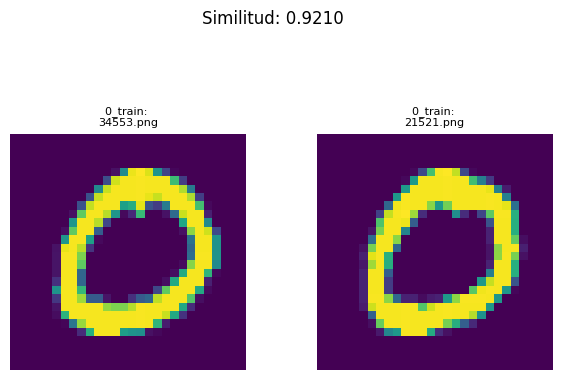

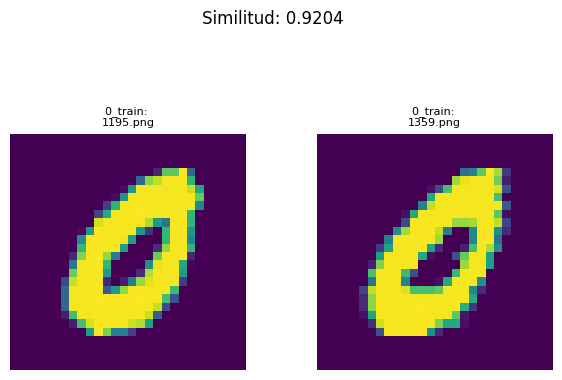

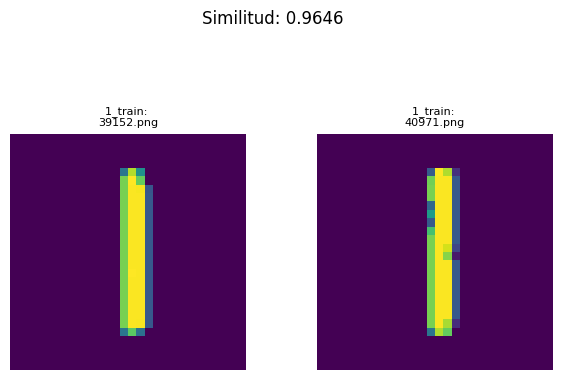

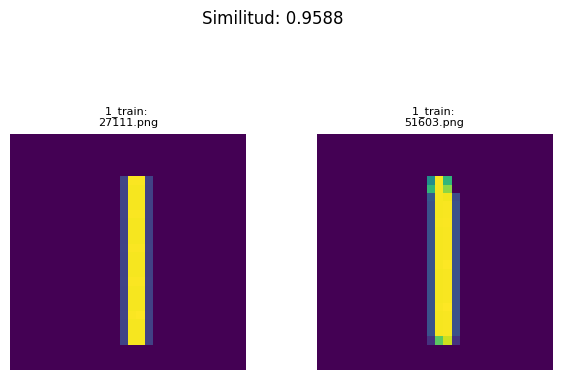

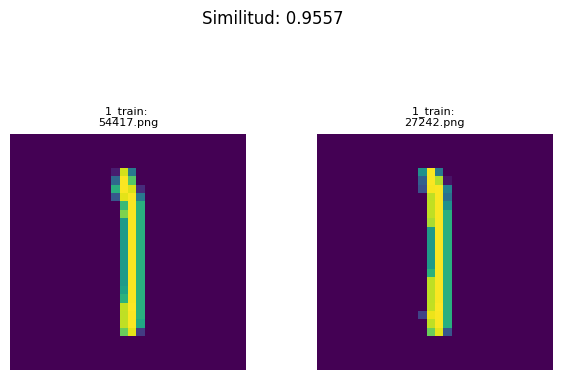

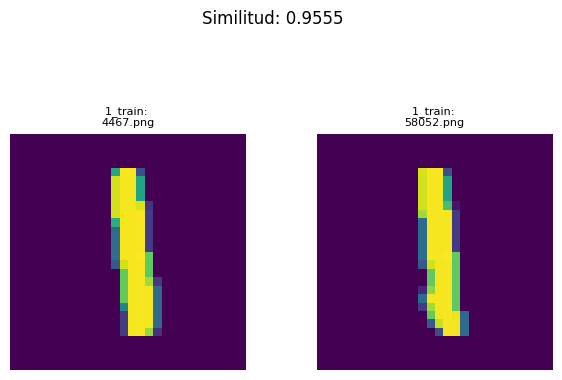

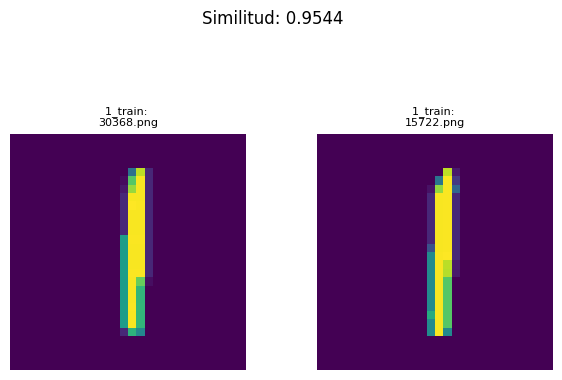

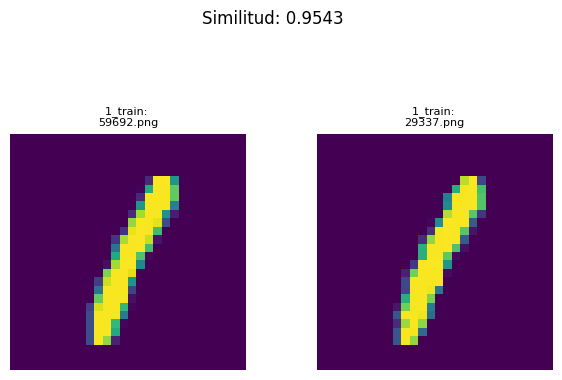

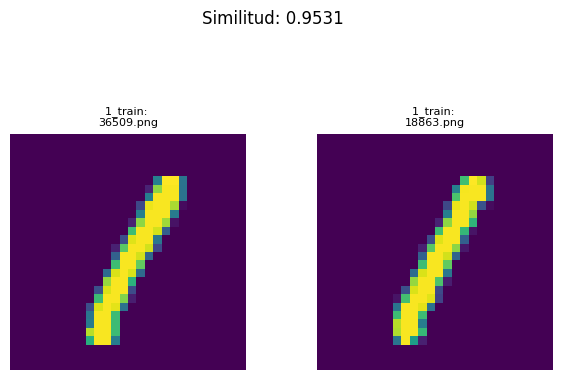

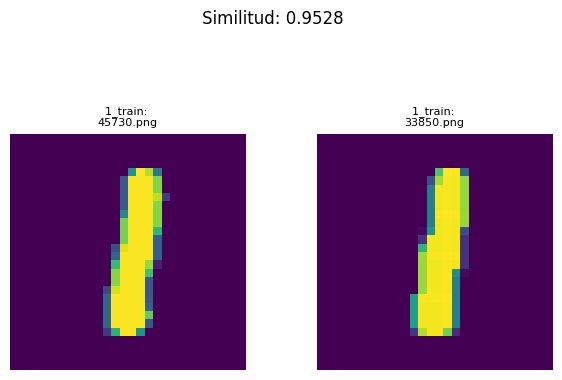

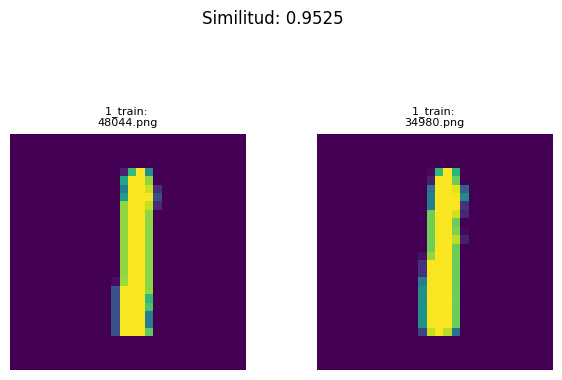

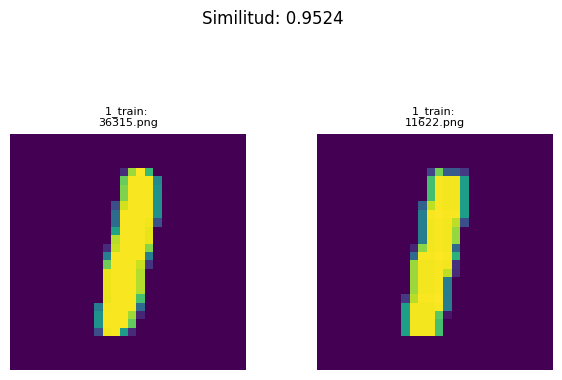

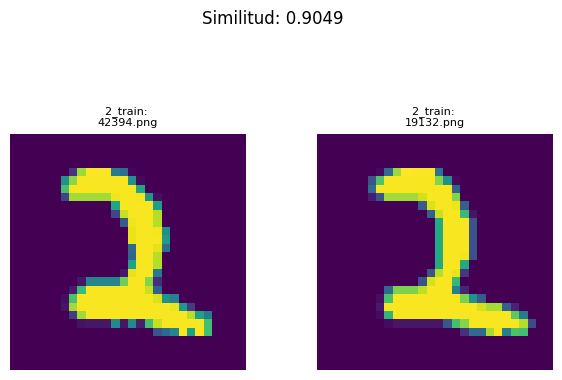

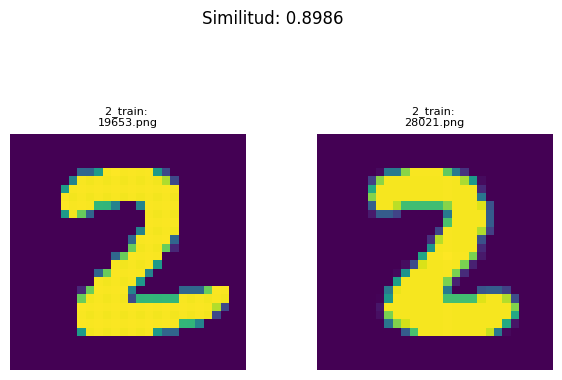

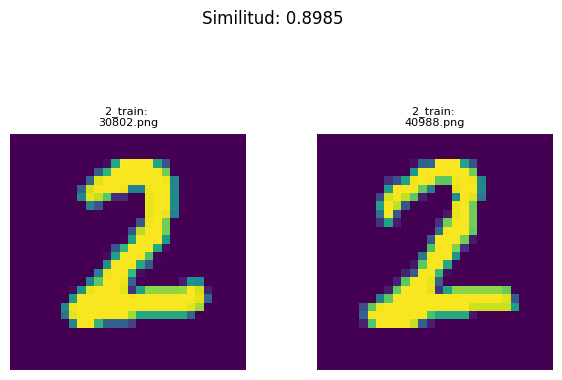

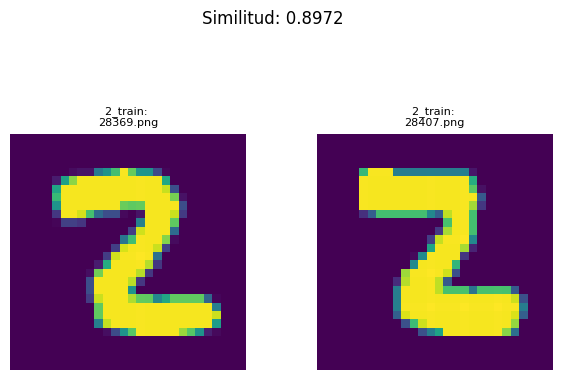

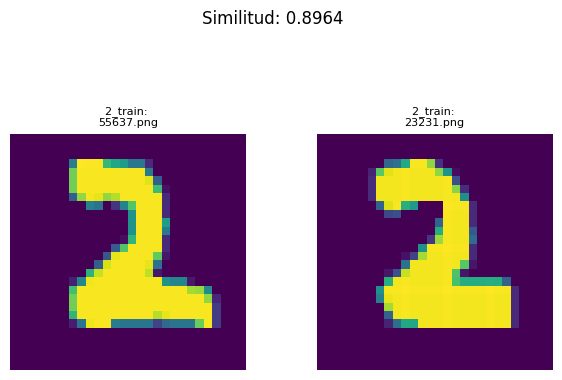

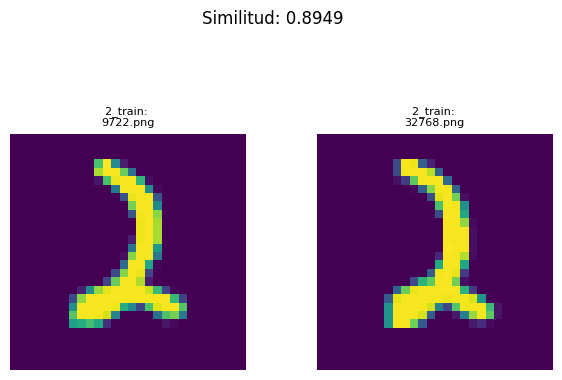

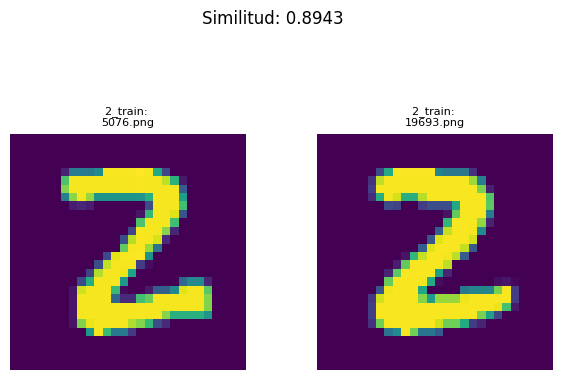

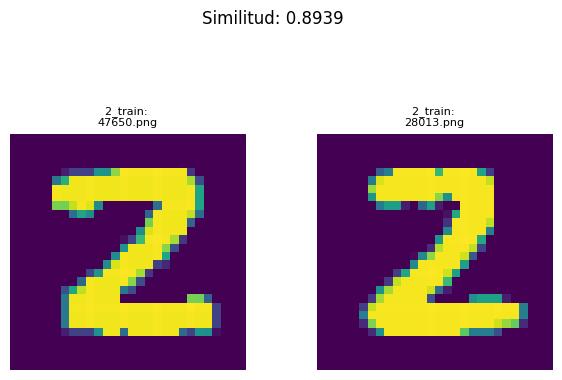

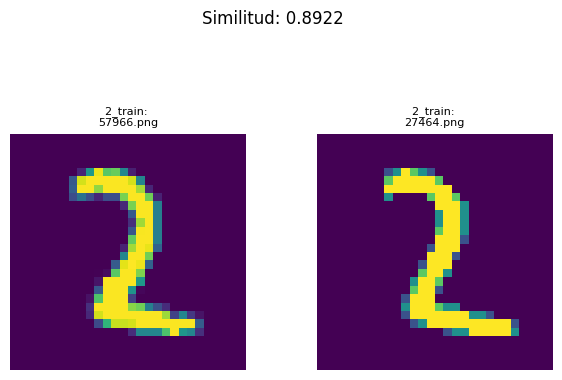

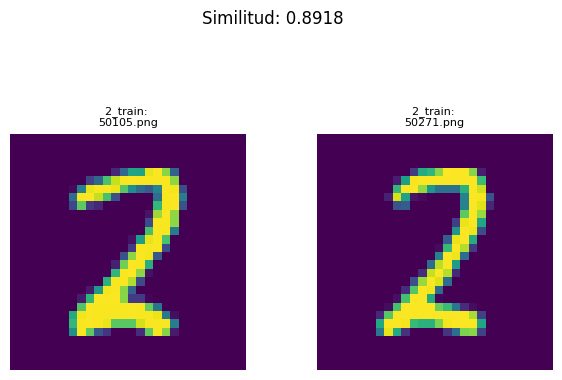

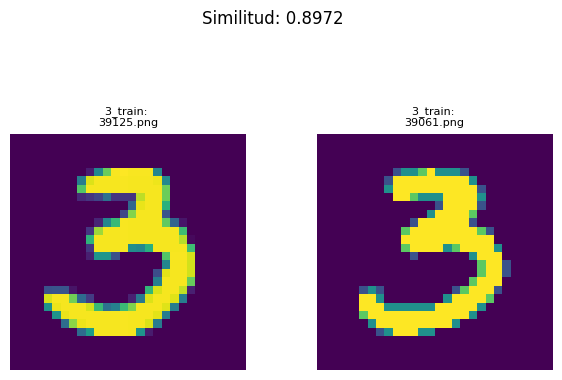

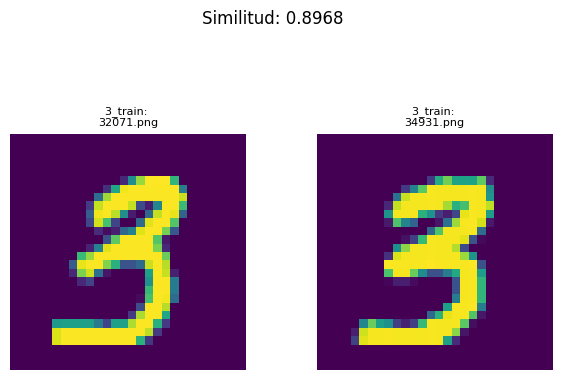

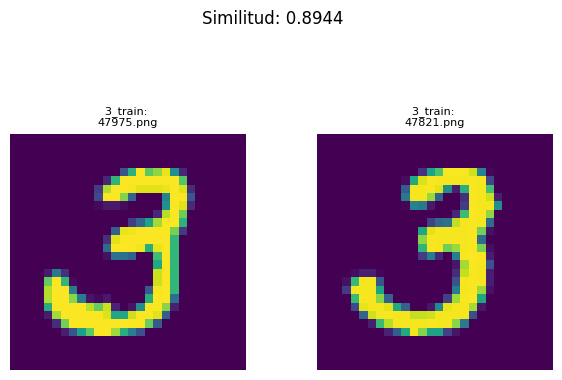

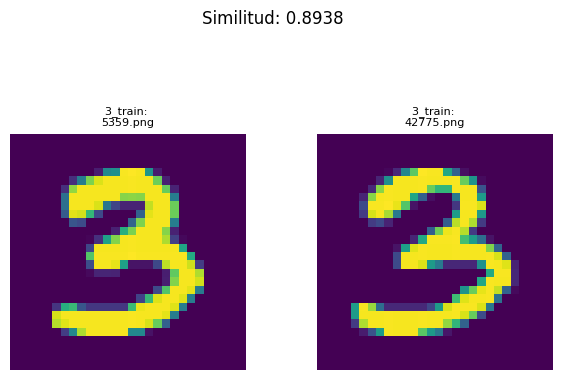

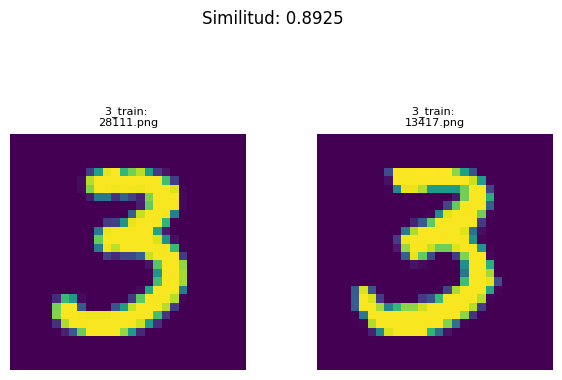

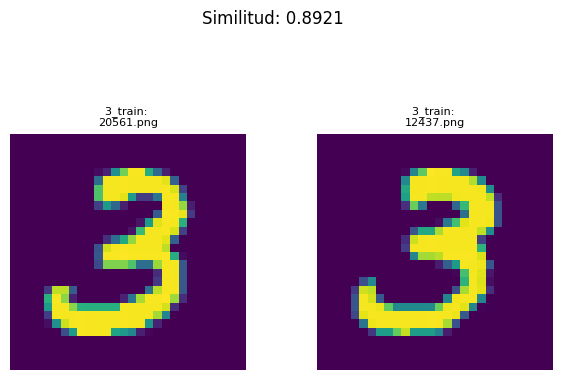

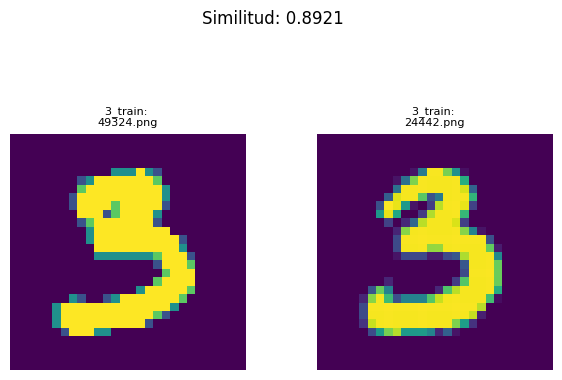

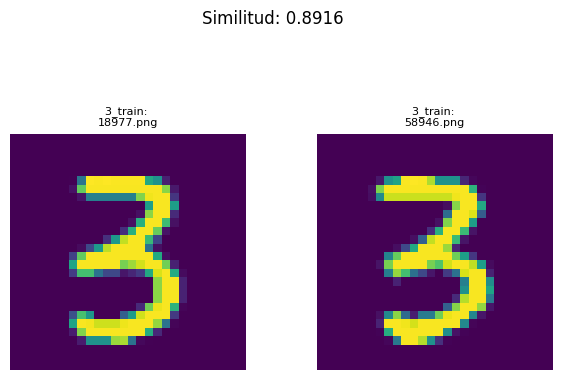

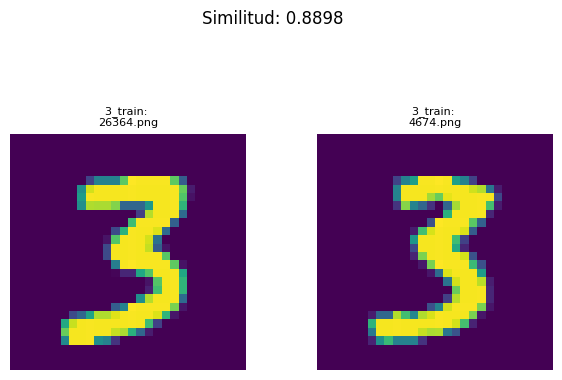

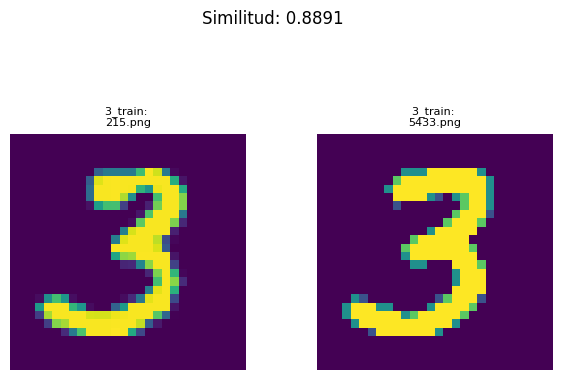

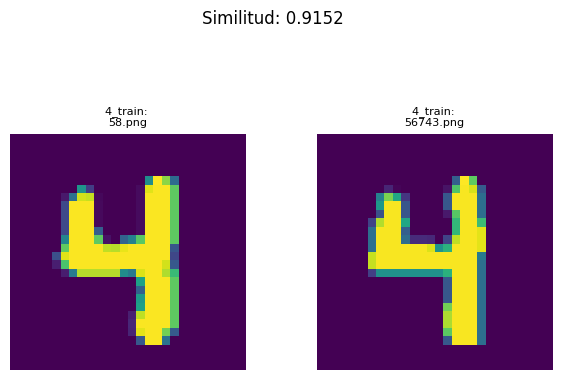

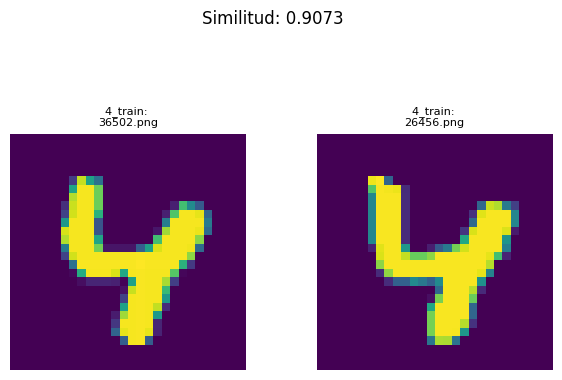

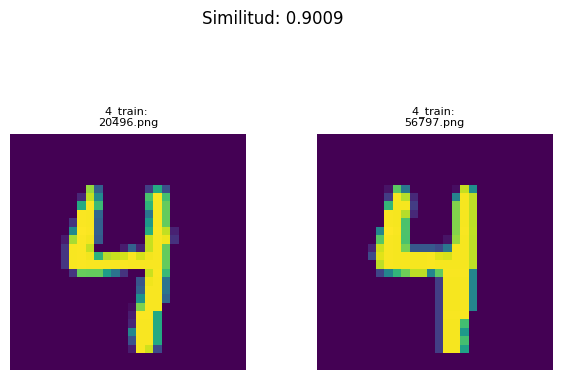

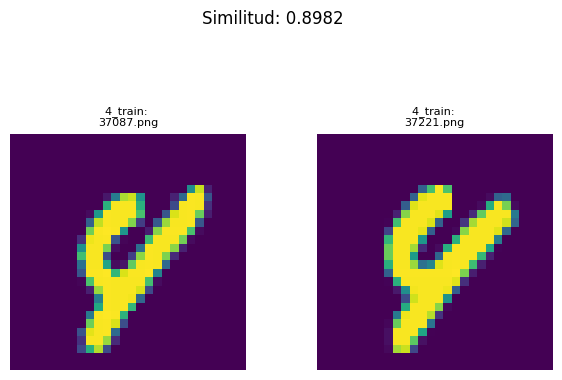

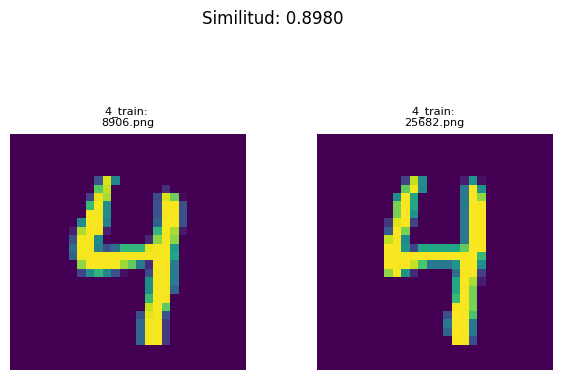

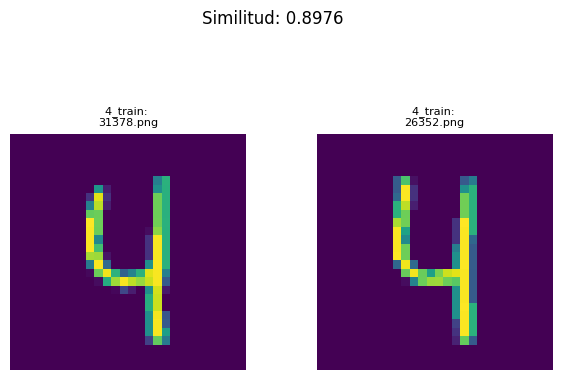

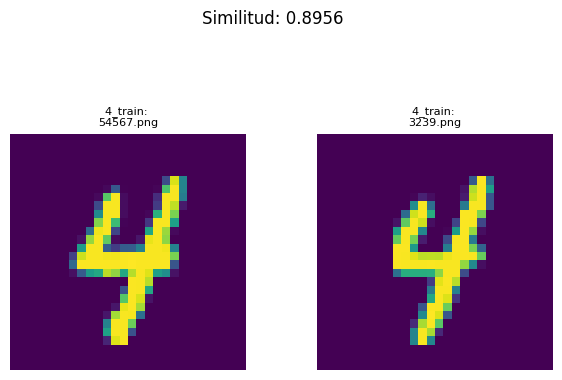

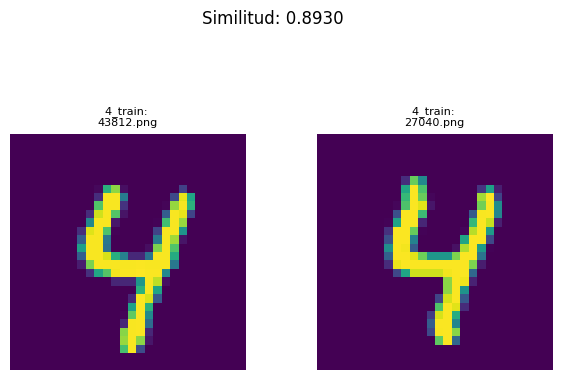

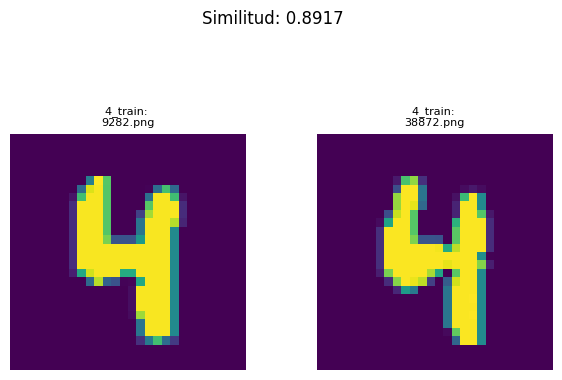

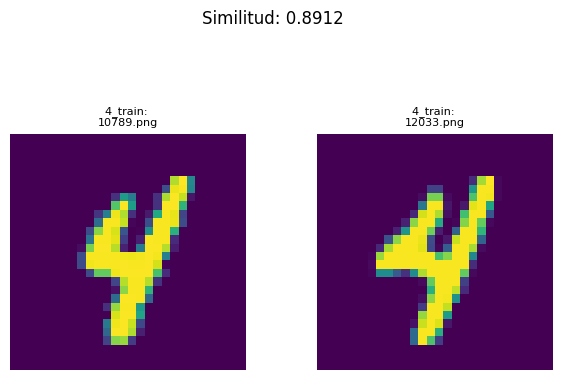

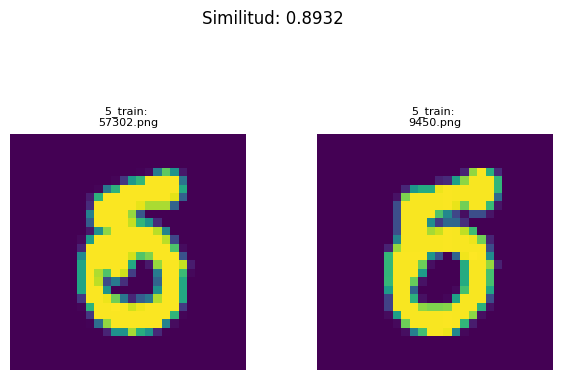

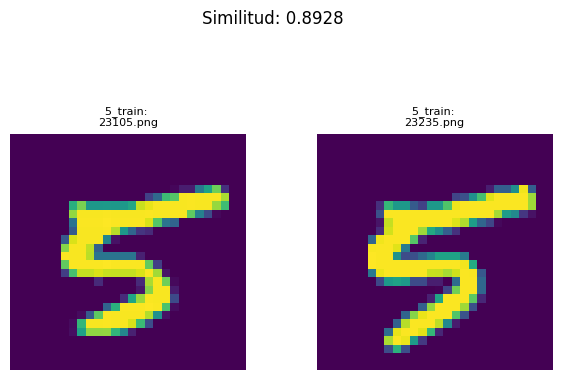

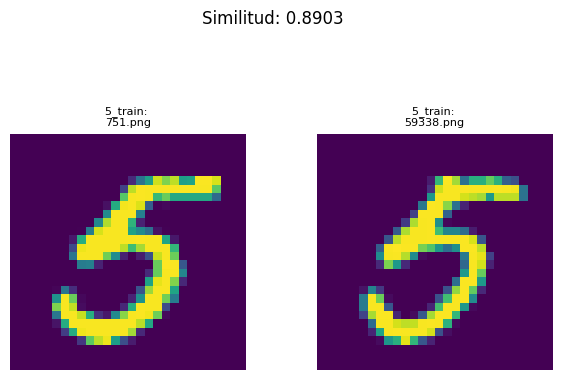

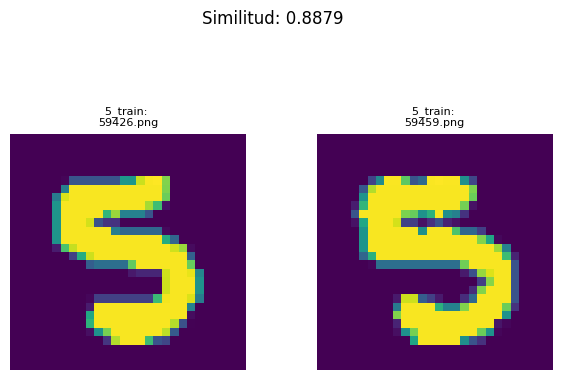

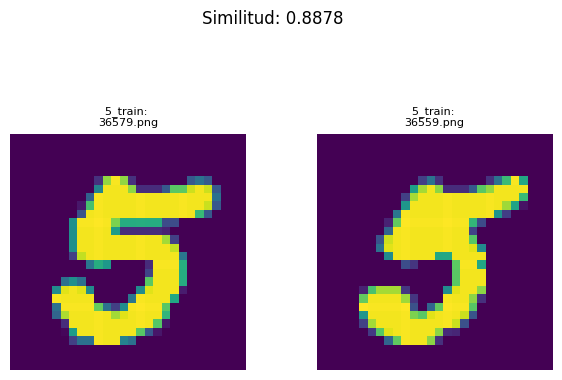

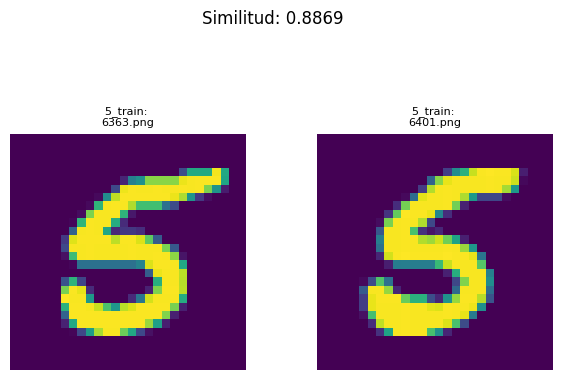

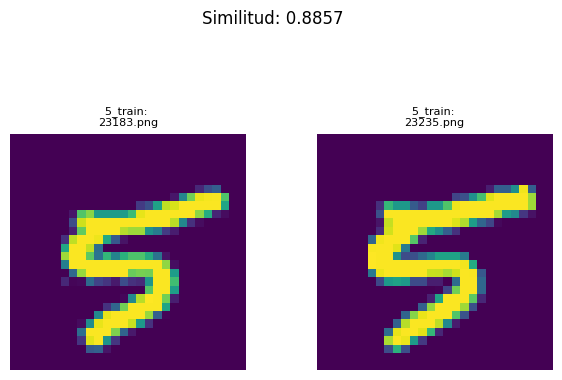

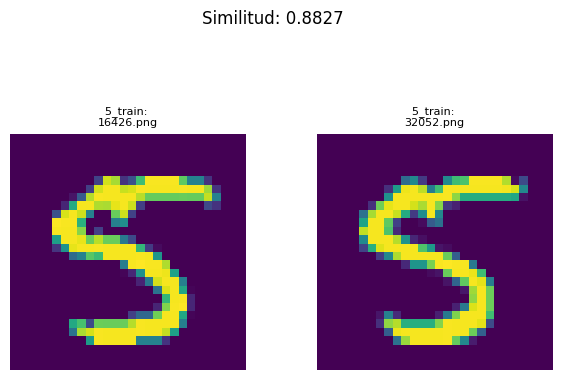

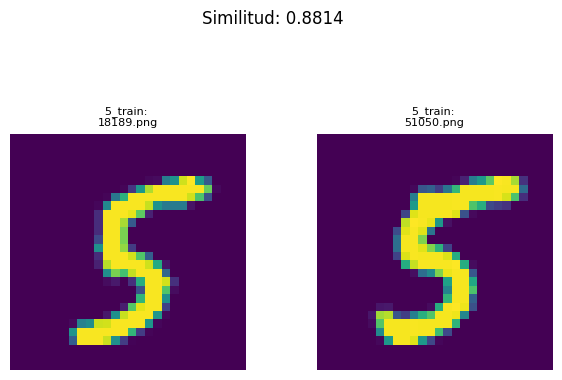

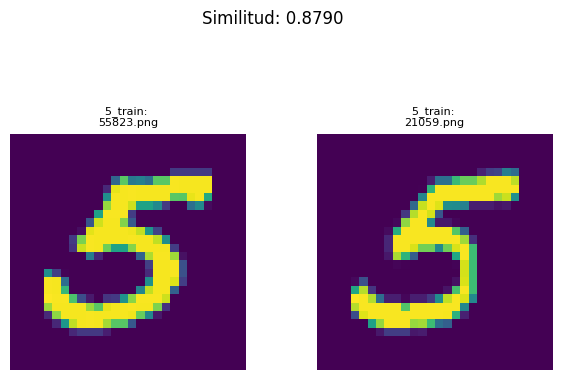

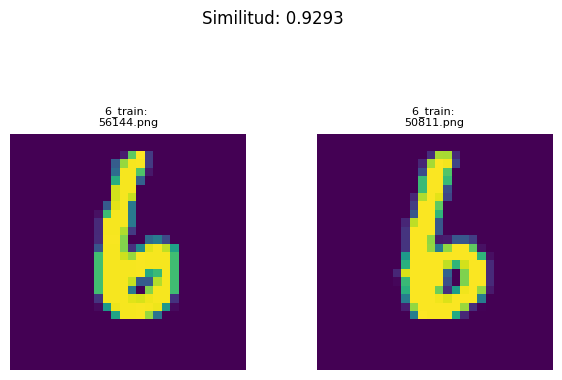

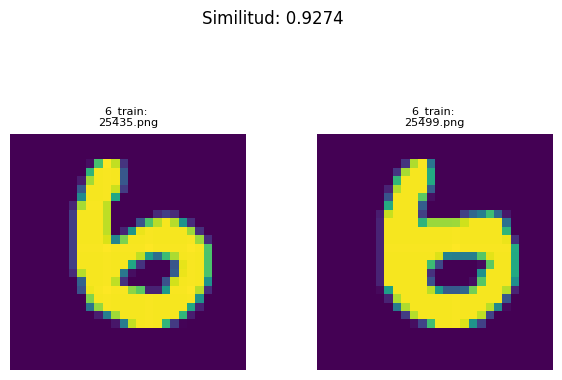

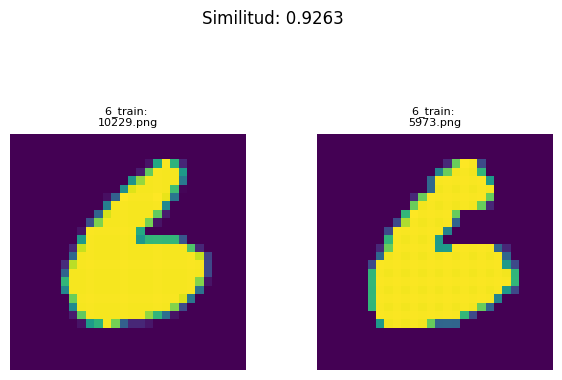

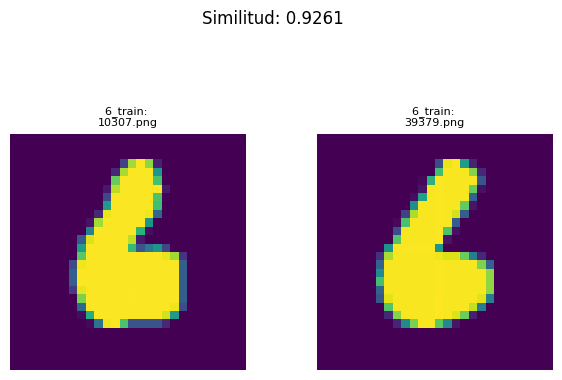

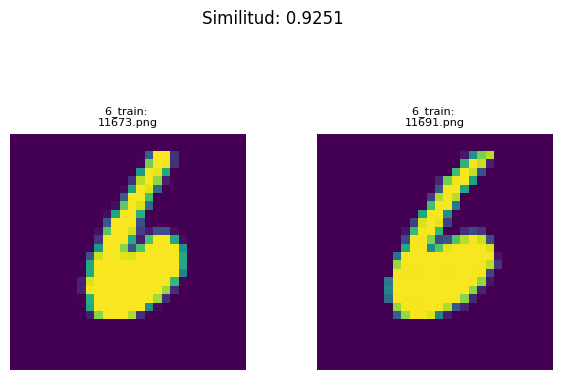

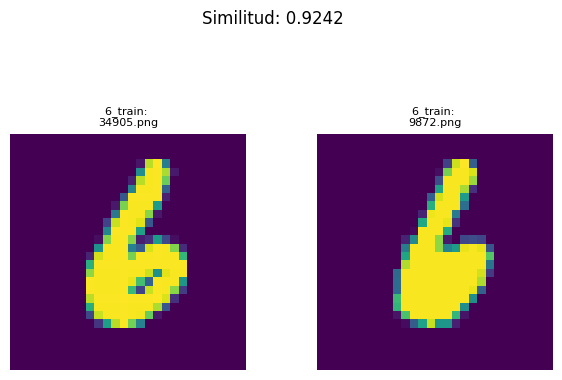

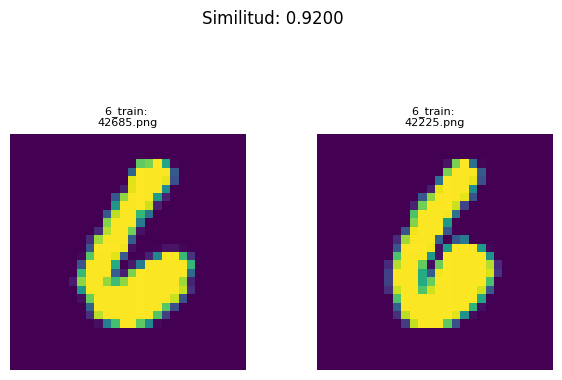

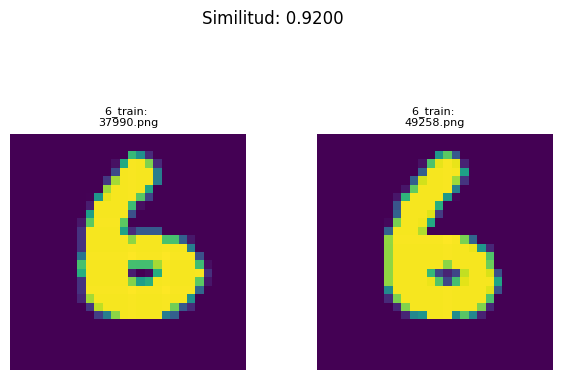

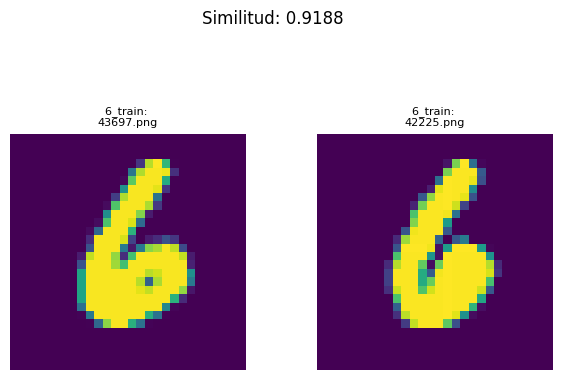

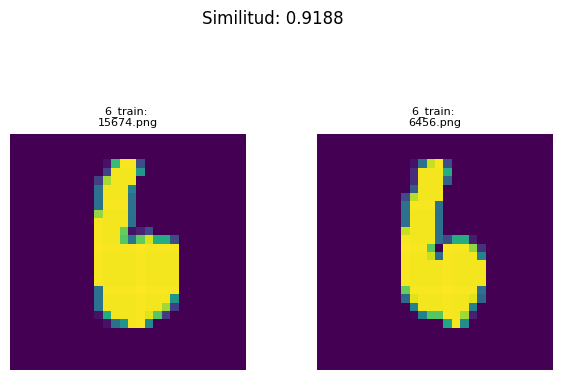

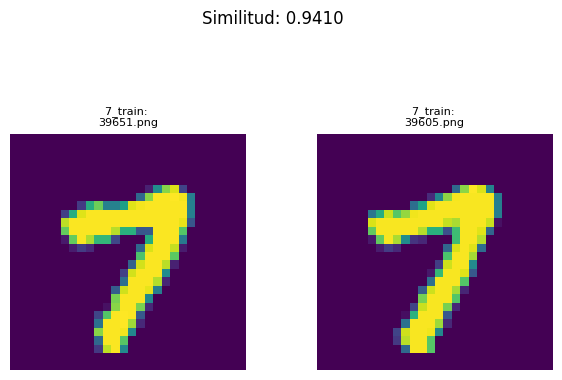

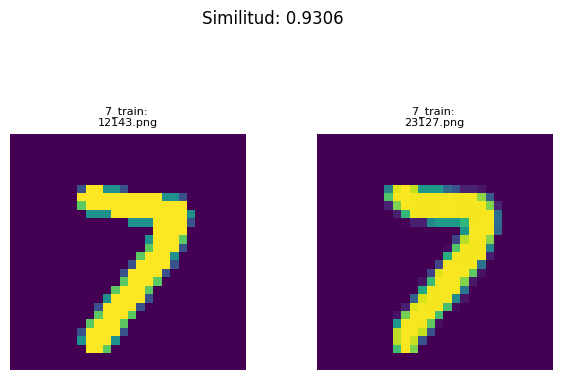

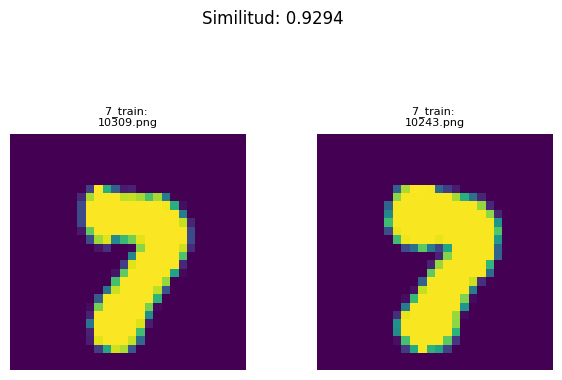

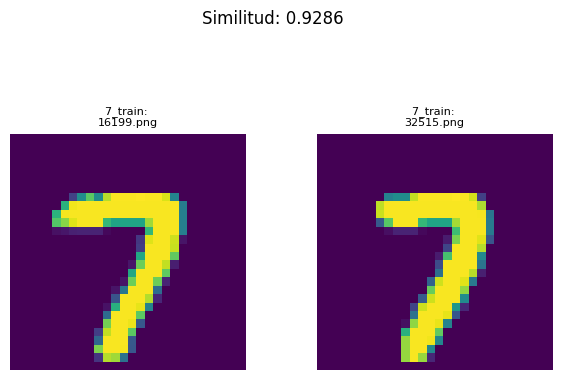

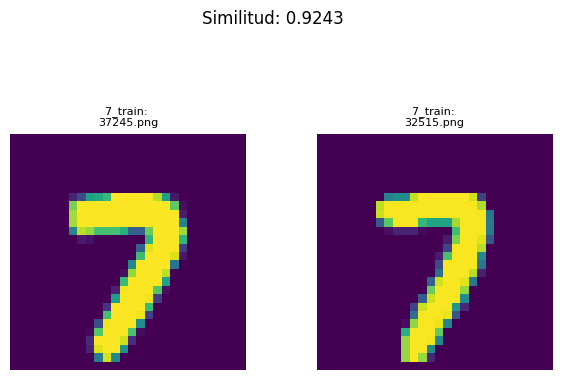

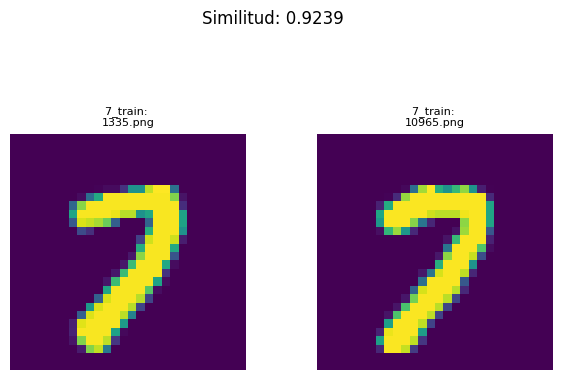

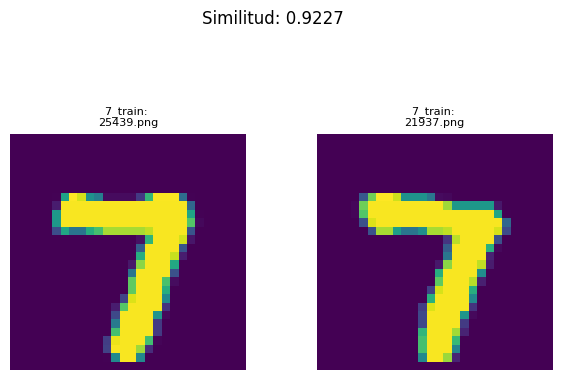

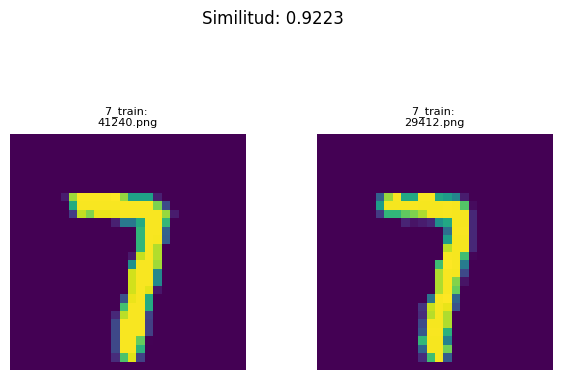

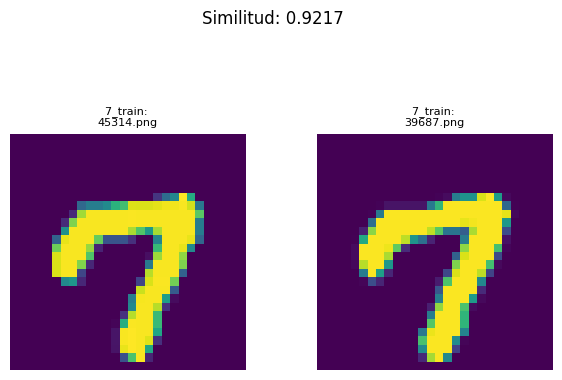

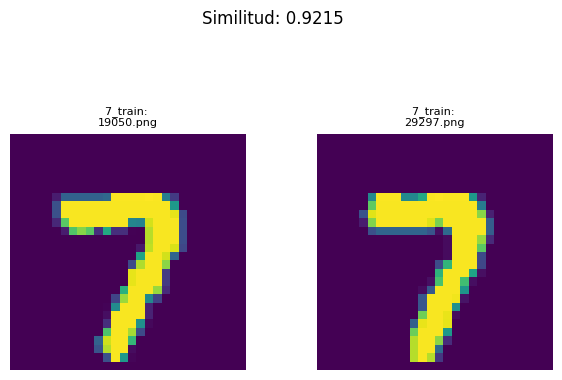

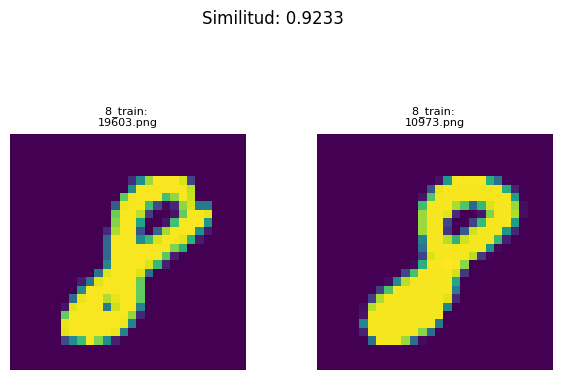

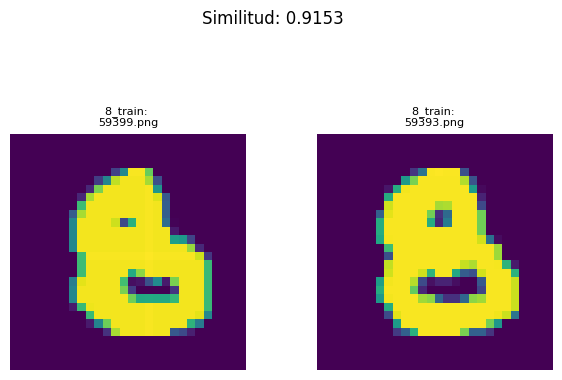

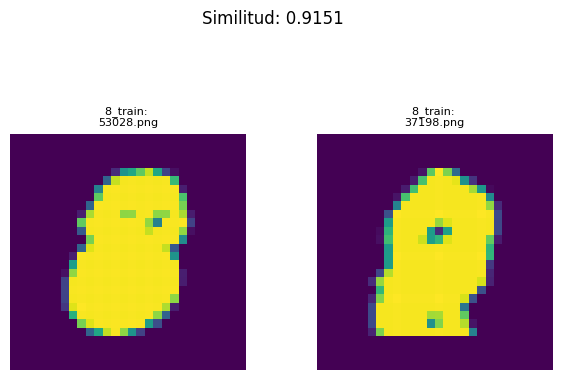

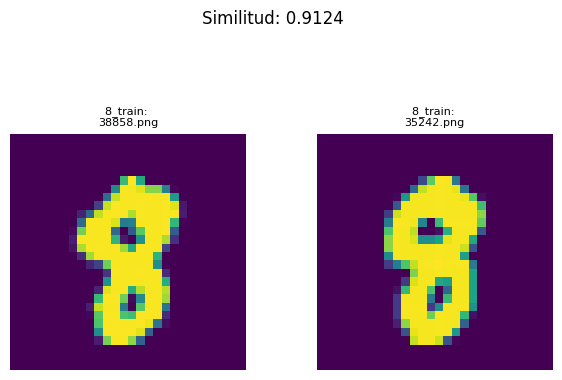

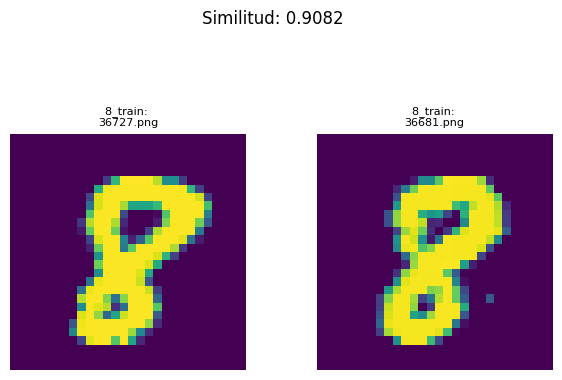

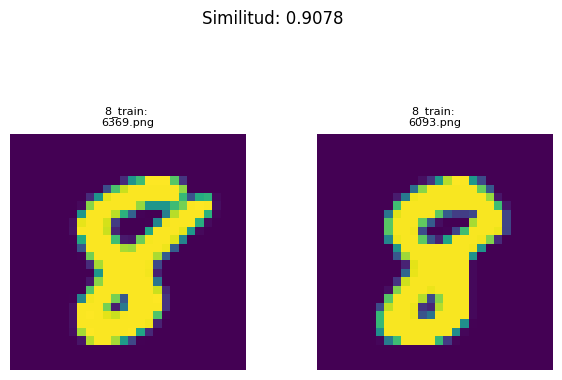

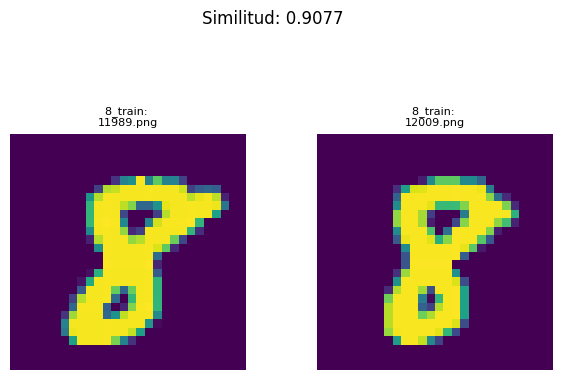

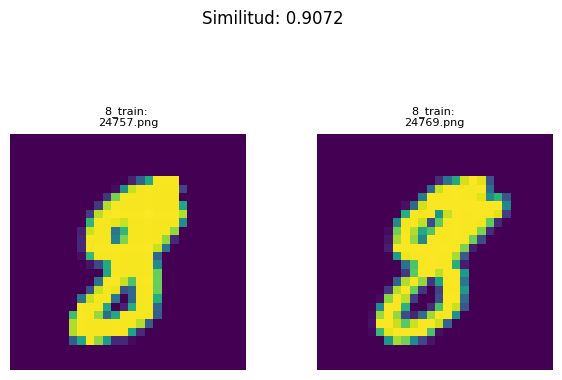

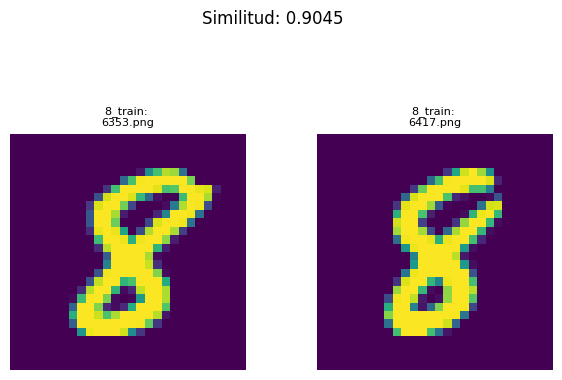

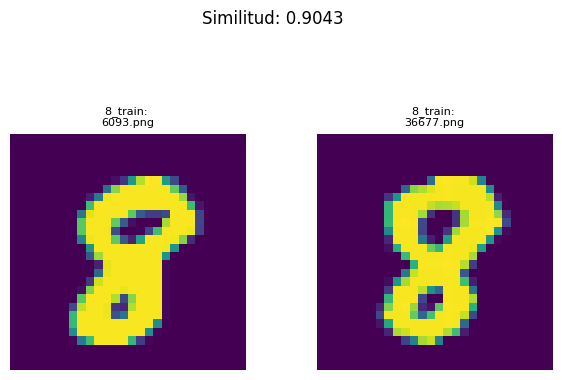

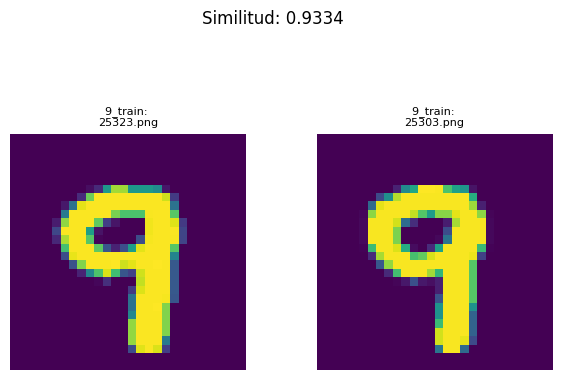

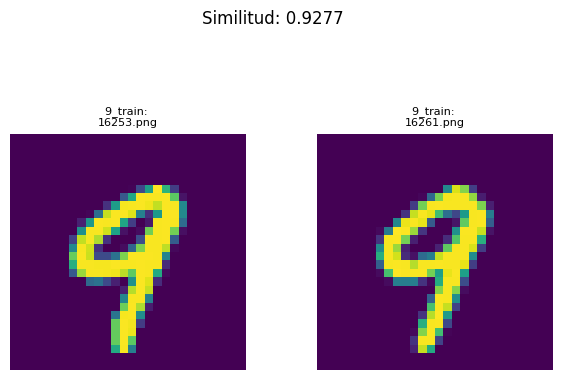

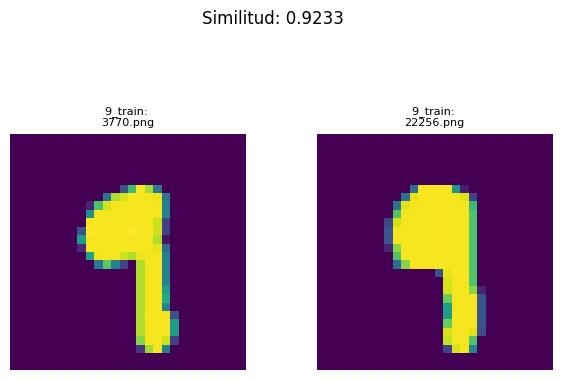

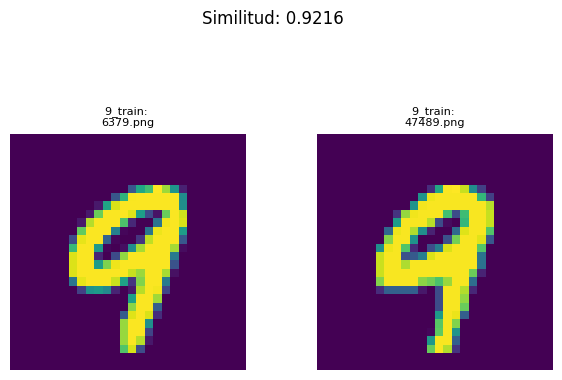

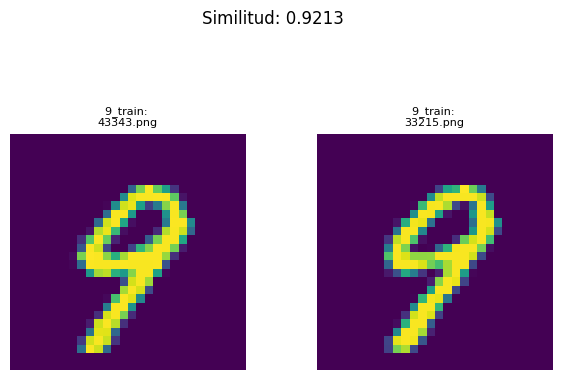

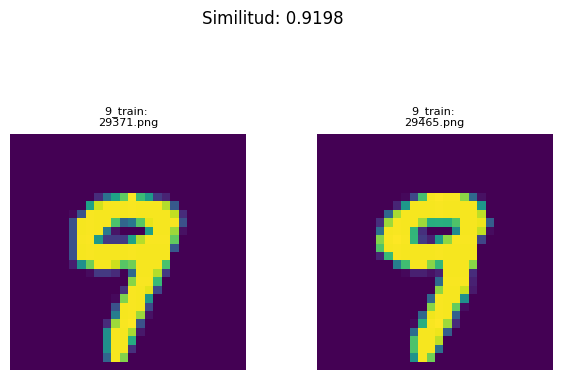

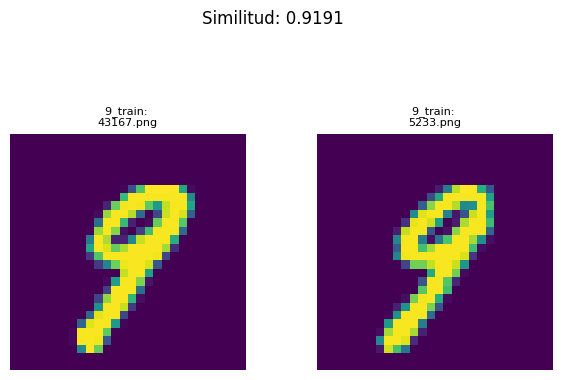

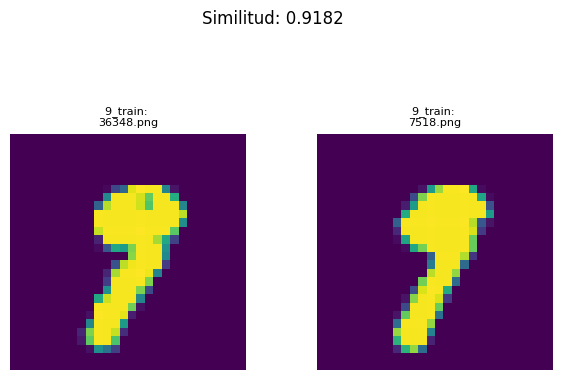

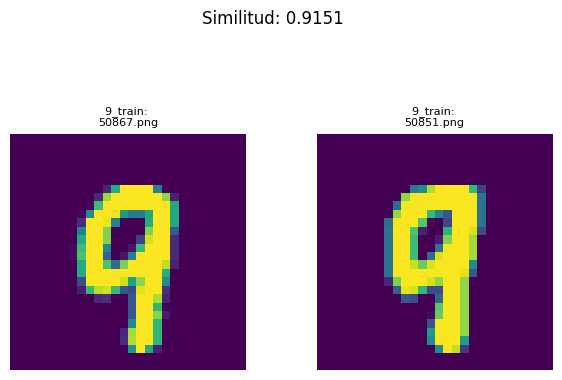

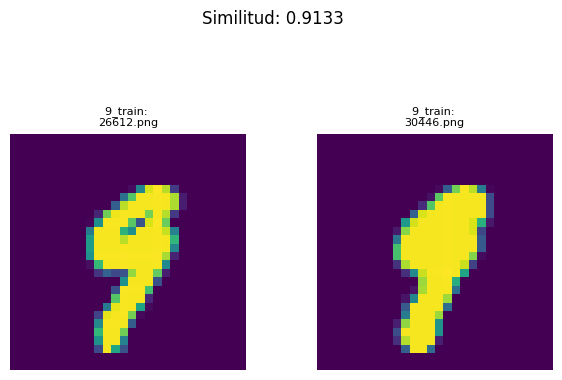

In [16]:
# Función para encontrar y mostrar las imágenes más similares dentro de cada clase usando la matriz C  

def show_most_similar_using_C_all_classes(estimator, class_names, filenames_dict):  
    images_to_show = []  # Lista para almacenar las imágenes y sus detalles  

    # Recorre las clases y genera la lista de descripciones  
    for class_intent in range(len(class_names)):  
        class_name = class_names[class_intent]  
        print(f"Clase: {class_name}")  
        
        # Obtener la matriz de similitud de las muestras dentro de la clase  
        C = estimator.C[class_intent]  

        # Imprimir la forma de la matriz de similitud de la clase  
        print(f"Forma de la matriz de la clase {class_name}: {C.shape}")
        
        # Ordenar los índices según las similitudes (de mayor a menor)  
        most_similar_indices = np.argsort(-C, axis=None)  
        
        shown_pairs = set()  # Para rastrear los pares de índices ya mostrados  
        count = 0  
        show_samples = 10  # Número de muestras para visualizar la similitud  
        
        # Diccionario para contar la participación de cada imagen  
        participation_count = {}

        for idx in most_similar_indices:  
            if count >= show_samples:  
                break  
            
            # Convertir el índice plano a índice 2D  
            idx_2d = np.unravel_index(idx, C.shape)  
            
            # Saltar las comparaciones de una muestra consigo misma  
            if idx_2d[0] == idx_2d[1]:  
                continue  
            
            # Crear un par ordenado de índices para prevenir duplicados  
            index_pair = tuple(sorted((idx_2d[0], idx_2d[1])))  
            
            # Verificamos si el par ya fue mostrado  
            if index_pair in shown_pairs:  
                continue  
            
            shown_pairs.add(index_pair)  

            # Actualizar el conteo de participación  
            participation_count[idx_2d[0]] = participation_count.get(idx_2d[0], 0) + 1  
            participation_count[idx_2d[1]] = participation_count.get(idx_2d[1], 0) + 1
            
            # Obtener los índices de las muestras en el dataset  
            source_idx = estimator.class_indices[class_intent][idx_2d[0]]  
            target_idx = estimator.class_indices[class_intent][idx_2d[1]]  
            
            # Verificar que los índices estén dentro de los límites del dataset  
            if source_idx < len(filenames_dict) and target_idx < len(filenames_dict):  
                source_filename = Path(filenames_dict[int(source_idx)])  
                target_filename = Path(filenames_dict[int(target_idx)])  
                
                value = C[idx_2d]  
                
                # Formatear y mostrar la salida  
                print(f"\t{source_filename.name} ({class_name}) vs {target_filename.name} ({class_name}), Similitud: {value:.4f}")  
                
                # Agrega los detalles a la lista para visualización  
                images_to_show.append((source_filename, target_filename, class_name, value))  
                
                count += 1  

                
        # Encontrar las muestras más atípicas  
        most_atypical = sorted(participation_count.items(), key=lambda x: -x[1])  
        
        # Mostrar las 10 más atípicas  
        print("\nMuestras más atípicas de esta clase:")  
        for rank, (img_idx, freq) in enumerate(most_atypical[:10], 1):  
            img_name = Path(filenames_dict[int(estimator.class_indices[class_intent][img_idx])]).name  
            print(f"\t#{rank}: {img_name} con {freq} apariciones")  
        print("\n")
    
    # Luego, realiza la visualización de las imágenes  
    for source_filename, target_filename, class_name, value in images_to_show:  
        img_source = plt.imread(source_filename)  
        img_target = plt.imread(target_filename)  
        
        fig, axs = plt.subplots(1, 2, figsize=(7, 5))  
        axs[0].imshow(img_source)  
        axs[0].set_title(f"{class_name}: \n{source_filename.name}", fontsize=8)  
        axs[0].axis('off')  # Elimina los ejes para centrar la atención en la imagen  
        
        axs[1].imshow(img_target)  
        axs[1].set_title(f"{class_name}: \n{target_filename.name}", fontsize=8)  
        axs[1].axis('off')  
        plt.suptitle(f"Similitud: {value:.4f}")  
        plt.subplots_adjust(wspace=0.3, hspace=0.3)  # Ajusta el espacio entre subtramas  
        plt.show()  

print("Muestras más similares entre las imágenes de la misma clase \n")  
show_most_similar_using_C_all_classes(estimator, class_names_train, filenames_dict)

In [17]:
# import csv  
# from pathlib import Path  

# def show_least_similar_using_C_all_classes(estimator, class_names, filenames_dict):  
#     # Recolectar todas las comparaciones en una lista  
#     all_comparisons = []  
#     atypical_samples = []  

#     for class_intent in range(len(class_names)):  
#         class_name = class_names[class_intent]  

#         # Obtener la matriz de similitud de las muestras dentro de la clase  
#         C = estimator.C[class_intent]  

#         # Ordenar los índices según las similitudes (de menor a mayor)  
#         least_similar_indices = np.argsort(C, axis=None)  

#         shown_pairs = set()  
#         count = 0  
#         show_samples = 100  # Cambiar para capturar las primeras 100 comparaciones  

#         participation_count = {}  

#         for idx in least_similar_indices:  
#             if count >= show_samples:  
#                 break  

#             idx_2d = np.unravel_index(idx, C.shape)  

#             if idx_2d[0] == idx_2d[1]:  
#                 continue  

#             index_pair = tuple(sorted((idx_2d[0], idx_2d[1])))  
#             if index_pair in shown_pairs:  
#                 continue  

#             shown_pairs.add(index_pair)  

#             participation_count[idx_2d[0]] = participation_count.get(idx_2d[0], 0) + 1  
#             participation_count[idx_2d[1]] = participation_count.get(idx_2d[1], 0) + 1  

#             # Obtener los índices de las muestras en el dataset  
#             source_idx = estimator.class_indices[class_intent][idx_2d[0]]  
#             target_idx = estimator.class_indices[class_intent][idx_2d[1]]  

#             if source_idx < len(filenames_dict) and target_idx < len(filenames_dict):  
#                 source_filename = Path(filenames_dict[int(source_idx)])  
#                 target_filename = Path(filenames_dict[int(target_idx)])  

#                 value = C[idx_2d]  

#                 # Agrega los detalles a la lista de comparaciones  
#                 all_comparisons.append(  
#                     (class_name, source_filename.name, target_filename.name, value)  
#                 )  

#                 count += 1  

#         # Encontrar las muestras más atípicas  
#         most_atypical = sorted(participation_count.items(), key=lambda x: -x[1])  

#         # Agregar las 10 más atípicas a la lista  
#         for rank, (img_idx, freq) in enumerate(most_atypical[:10], 1):  
#             img_name = Path(filenames_dict[int(estimator.class_indices[class_intent][img_idx])]).name  
#             atypical_samples.append((class_name, img_name, freq))  

#     # Exportar comparaciones a CSV  
#     with open("most_similar_comparisons_MNIST.csv", mode="w", newline="") as csv_file:  
#         writer = csv.writer(csv_file)  
#         writer.writerow(["Class Name", "Source Image", "Target Image", "Similarity"])  
#         writer.writerows(all_comparisons)  

#     # Exportar muestras atípicas a CSV  
#     with open("atypical_samples_MNIST.csv", mode="w", newline="") as csv_file:  
#         writer = csv.writer(csv_file)  
#         writer.writerow(["Class Name", "Image Name", "Frequency"])  
#         writer.writerows(atypical_samples)  

#     # Exportar comparaciones a TXT  
#     with open("most_similar_comparisons_MNIST.txt", mode="w") as txt_file:  
#         for class_name, source_fname, target_fname, value in all_comparisons:  
#             txt_file.write(  
#                 f"Clase: {class_name}, {source_fname} vs {target_fname}, Similitud: {value:.4f}\n"  
#             )  

#     # Exportar muestras atípicas a TXT  
#     with open("atypical_samples_MNIST.txt", mode="w") as txt_file:  
#         for class_name, img_name, freq in atypical_samples:  
#             txt_file.write(  
#                 f"Clase: {class_name}, Imagen: {img_name}, Frecuencia: {freq}\n"  
#             )  

# print("Exporting comparisons and atypical samples to CSV and TXT...")  
# show_least_similar_using_C_all_classes(estimator, class_names_train, filenames_dict)